<a href="https://colab.research.google.com/github/FaiqPrasetya/pvck-tugas/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import library
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

## 1. Gamma Correction

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


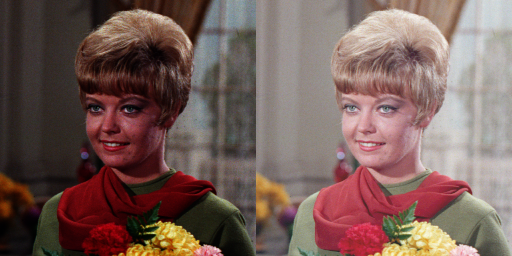

In [3]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/PVCK/Pertemuan 5/assets/female.tiff')
gamma_img = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_img[y, x, c] = np.clip(255 * pow((original[y, x, c]) / 255, (1 / gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_img))
cv2_imshow(final_frame)

## 2. Bit Depth

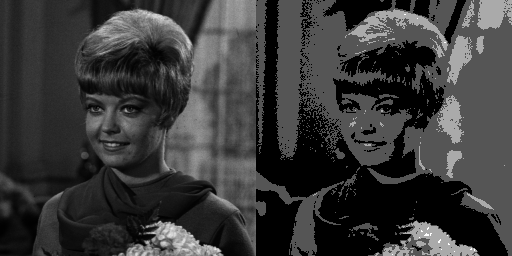

In [14]:
bit_depth = 2
level = 255 / (pow(2, bit_depth) - 1)
original = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/PVCK/Pertemuan 5/assets/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    depth_image[y, x] = np.clip(round(original[y, x] / level) * level, 0, 255)

# Note: 
# round(img / lvl), bukan round(img / lvl * lvl)

final_frame = cv.hconcat((original, depth_image))
cv2_imshow(final_frame)

## 3. Buat modul Average Denoising 

In [5]:
# Import Library
import glob
from math import sqrt, log10

# Read Image
original = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/PVCK/Pertemuan 5/assets/galaxy.jpg')

# Masukkan Image ke Array
cv_img = []
for img in glob.glob('/content/drive/MyDrive/Kuliah/Semester 6/PVCK/Pertemuan 5/assets/noises/*.jpg'):
 n = cv.imread(img)
 cv_img.append(n)

### Jumlah Citra Average 5

Jumlah Citra = 5
Nilai PSNR = 27.54072543838764 dB
Nilai MSE = 114.55335601478495


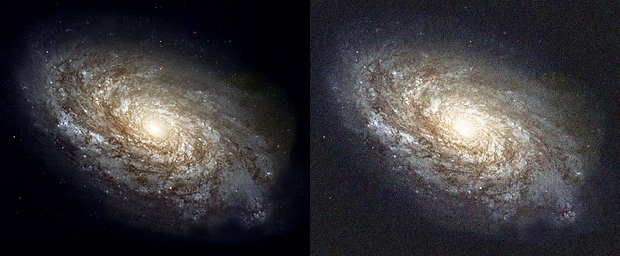

In [16]:
# Jumlah Citra
# Ubah sesuai keperluan
jml_citra = 5

noise_image = cv_img[jml_citra - 1]

for i in range(jml_citra):
  alpha = 1.0 / (i + 1)
  beta = 1.0 - alpha
  noise_image = cv.addWeighted(cv_img[i], alpha, noise_image, beta, 0.0)

# img1 = original image
# img2 = denoise image yg sudah dirata-ratakan

def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0):
    # MSE 0 = tidak ada noise
    # PSNR tidak berarti jika MSE 0
    return 100
  max_pixel = 255.0
  psnr = 20 * log10(max_pixel / sqrt(mse))
  return psnr

mse = np.mean((original - noise_image) ** 2)
psnr = PSNR(original, noise_image)

print('Jumlah Citra =', jml_citra)
print('Nilai PSNR =', psnr, 'dB' )
print('Nilai MSE =', mse)

final_frame = cv.hconcat((original, noise_image))
cv2_imshow(final_frame)

### Jumlah Citra 30

Jumlah Citra = 30
Nilai PSNR = 27.51761499413865 dB
Nilai MSE = 115.16456233198925


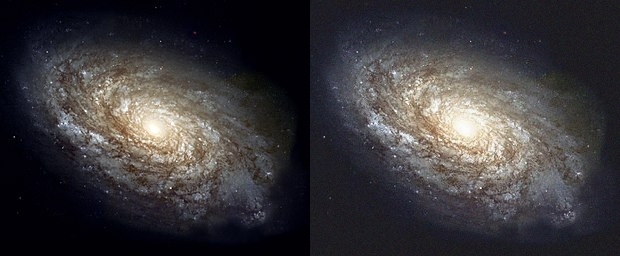

In [17]:
# Jumlah Citra
# Ubah sesuai keperluan
jml_citra = 30

noise_image = cv_img[jml_citra - 1]

for i in range(jml_citra):
  alpha = 1.0 / (i + 1)
  beta = 1.0 - alpha
  noise_image = cv.addWeighted(cv_img[i], alpha, noise_image, beta, 0.0)

# img1 = original image
# img2 = denoise image yg sudah dirata-ratakan

def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0):
    # MSE 0 = tidak ada noise
    # PSNR tidak berarti jika MSE 0
    return 100
  max_pixel = 255.0
  psnr = 20 * log10(max_pixel / sqrt(mse))
  return psnr

mse = np.mean((original - noise_image) ** 2)
psnr = PSNR(original, noise_image)

print('Jumlah Citra =', jml_citra)
print('Nilai PSNR =', psnr, 'dB' )
print('Nilai MSE =', mse)

final_frame = cv.hconcat((original, noise_image))
cv2_imshow(final_frame)

### Jumlah Citra 60

Jumlah Citra = 60
Nilai PSNR = 27.498841267550045 dB
Nilai MSE = 115.66347446236558


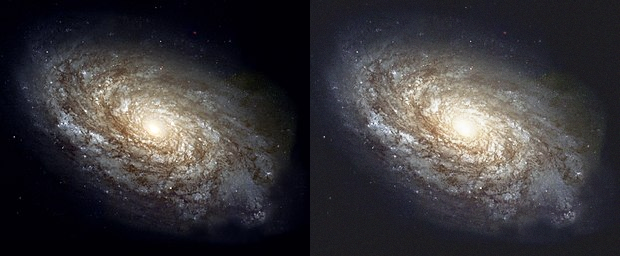

In [18]:
# Jumlah Citra
# Ubah sesuai keperluan
jml_citra = 60

noise_image = cv_img[jml_citra - 1]

for i in range(jml_citra):
  alpha = 1.0 / (i + 1)
  beta = 1.0 - alpha
  noise_image = cv.addWeighted(cv_img[i], alpha, noise_image, beta, 0.0)

# img1 = original image
# img2 = denoise image yg sudah dirata-ratakan

def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0):
    # MSE 0 = tidak ada noise
    # PSNR tidak berarti jika MSE 0
    return 100
  max_pixel = 255.0
  psnr = 20 * log10(max_pixel / sqrt(mse))
  return psnr

mse = np.mean((original - noise_image) ** 2)
psnr = PSNR(original, noise_image)

print('Jumlah Citra =', jml_citra)
print('Nilai PSNR =', psnr, 'dB' )
print('Nilai MSE =', mse)

final_frame = cv.hconcat((original, noise_image))
cv2_imshow(final_frame)

### Jumlah Citra 80

Jumlah Citra = 80
Nilai PSNR = 27.50683405753119 dB
Nilai MSE = 115.45080225134409


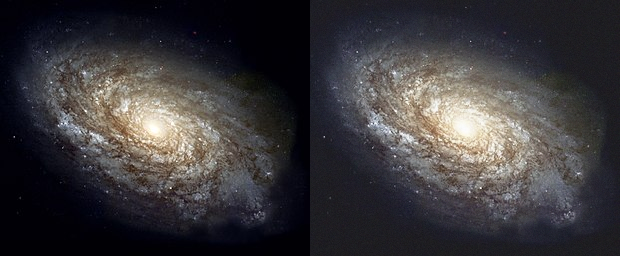

In [19]:
# Jumlah Citra
# Ubah sesuai keperluan
jml_citra = 80

noise_image = cv_img[jml_citra - 1]

for i in range(jml_citra):
  alpha = 1.0 / (i + 1)
  beta = 1.0 - alpha
  noise_image = cv.addWeighted(cv_img[i], alpha, noise_image, beta, 0.0)

# img1 = original image
# img2 = denoise image yg sudah dirata-ratakan

def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0):
    # MSE 0 = tidak ada noise
    # PSNR tidak berarti jika MSE 0
    return 100
  max_pixel = 255.0
  psnr = 20 * log10(max_pixel / sqrt(mse))
  return psnr

mse = np.mean((original - noise_image) ** 2)
psnr = PSNR(original, noise_image)

print('Jumlah Citra =', jml_citra)
print('Nilai PSNR =', psnr, 'dB' )
print('Nilai MSE =', mse)

final_frame = cv.hconcat((original, noise_image))
cv2_imshow(final_frame)

### Jumlah Citra 100

Jumlah Citra = 100
Nilai PSNR = 27.508657949347747 dB
Nilai MSE = 115.40232694892472


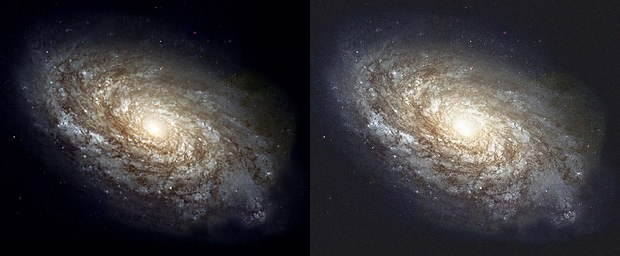

In [20]:
# Jumlah Citra
# Ubah sesuai keperluan
jml_citra = 100

noise_image = cv_img[jml_citra - 1]

for i in range(jml_citra):
  alpha = 1.0 / (i + 1)
  beta = 1.0 - alpha
  noise_image = cv.addWeighted(cv_img[i], alpha, noise_image, beta, 0.0)

# img1 = original image
# img2 = denoise image yg sudah dirata-ratakan

def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0):
    # MSE 0 = tidak ada noise
    # PSNR tidak berarti jika MSE 0
    return 100
  max_pixel = 255.0
  psnr = 20 * log10(max_pixel / sqrt(mse))
  return psnr

mse = np.mean((original - noise_image) ** 2)
psnr = PSNR(original, noise_image)

print('Jumlah Citra =', jml_citra)
print('Nilai PSNR =', psnr, 'dB' )
print('Nilai MSE =', mse)

final_frame = cv.hconcat((original, noise_image))
cv2_imshow(final_frame)

In [21]:
asd

NameError: ignored